In [1]:
import os
import pandas as pd

# Ruta al directorio que quieres explorar
directorio = 'images/raquelcanas/'

# Obtener la lista de nombres de carpetas en el directorio
nombres_carpetas = [nombre for nombre in os.listdir(directorio) if os.path.isdir(os.path.join(directorio, nombre))]

# Crear un DataFrame con los nombres de las carpetas
df = pd.DataFrame({'Nombres de Carpetas': nombres_carpetas})

df


,Nombres de Carpetas
0,1417763432044000401
1,1418349456876994330
2,1418495598893828413
3,1418553529010004918
4,1420637842983697168
...,...
1235,3180391334677033397
1236,3181851434939779896
1237,3185474732080748451
1238,3205767730580416619


In [10]:
import openpyxl
uwu = pd.read_csv('images/')
owo = uwu.sample(5)
owo

,mediaid,title,owner_username,date_local,mediacount,url,caption,caption_hashtags,caption_mentions,tagged_users,likes,comments,is_sponsored
1681,1237367586521523004,NaN,raquelcanas,2016-04-27_02-55-32_UTC,1,https://scontent-nrt1-2.cdninstagram.com/v/t51...,Un vestido denim siempre es una buena idea/ A ...,"['lookoftheday', 'stylerules']","['benettonsv', 'monicatorrento']","['ootdmagazine', 'whowhatwear', 'street_style_...",761,7,False
1029,1554720596327004363,NaN,raquelcanas,2017-07-08_23-39-19_UTC,1,https://scontent-nrt1-2.cdninstagram.com/v/t51...,Casual saturday!,[],[],['butter_sv'],2328,18,False
4061,313257281929257393,NaN,raquelcanas,2012-10-30_02-13-23_UTC,1,https://scontent-ams2-1.cdninstagram.com/v/t51...,Sneak peek of tomorrow's post #blog #outfit #p...,"['blog', 'outfit', 'post', 'fall', 'fashion', ...",[],[],27,1,False
262,2478003490621089659,NaN,raquelcanas,2021-01-02_20-57-37_UTC,1,https://scontent-ams4-1.cdninstagram.com/v/t51...,Mi sol solecito 🌞\nHoy me bendije con paz y al...,"['newyear2020', 'blessed']",['boamarswimwear'],['boamar'],2923,30,False
3242,715880706050532050,NaN,raquelcanas,2014-05-08_14-34-12_UTC,1,https://scontent-nrt1-1.cdninstagram.com/v/t51...,Travel outfit #details wearing @danielwellingt...,"['details', 'style', 'mystyle', 'mbfwsj', 'mod...","['danielwellingtonwatches', 'the_backroom', 'm...","['danielwellington', 'mariasbag', 'tbrelsalvad...",137,5,False


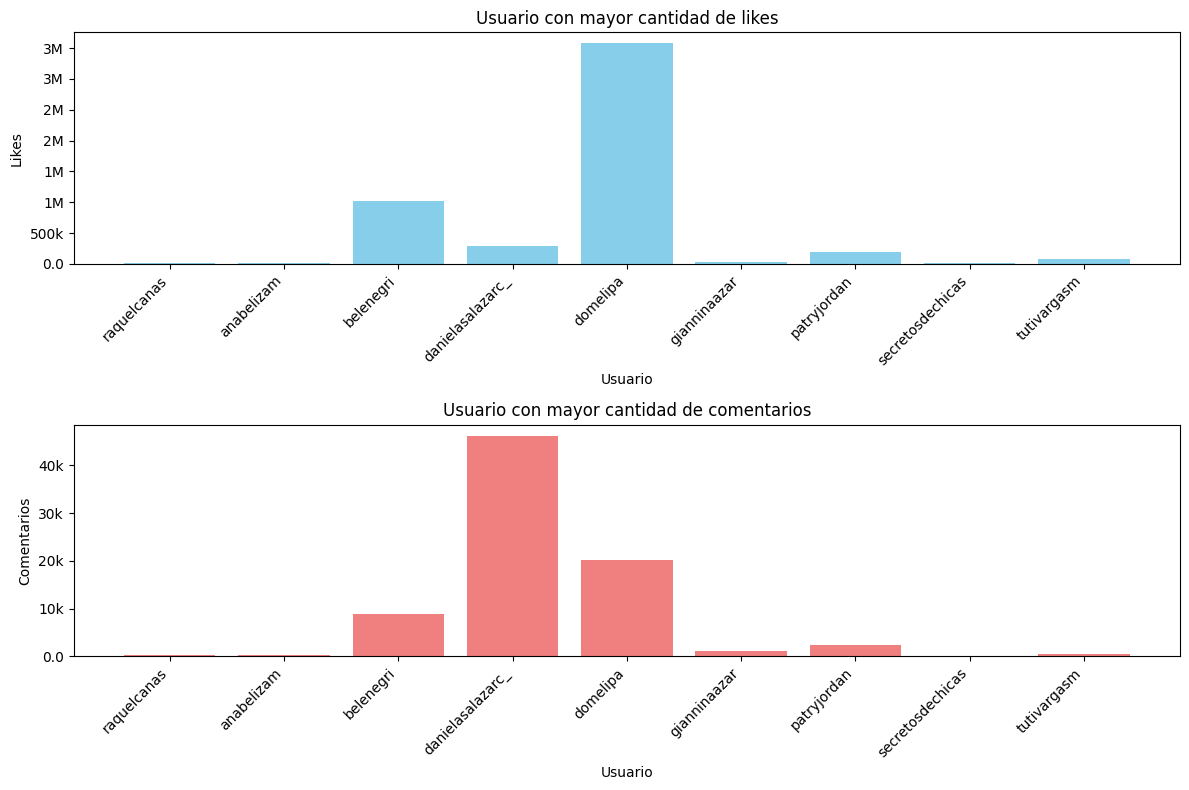

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Supongamos que tienes un diccionario de DataFrames, uno por cada usuario
# Aquí creamos un ejemplo con tres usuarios para demostración
usuarios = ['raquelcanas', 'anabelizam', 'belenegri', 'danielasalazarc_', 'domelipa', 'gianninaazar', 'patryjordan', 'secretosdechicas', 'tutivargasm']
dataframes = {}

for usuario in usuarios:
    dataframes[usuario] = pd.read_csv(f'images/{usuario}/{usuario}.csv')

# Crear un DataFrame consolidado con las 20 tuplas con más likes y comentarios de cada usuario
top_consolidado = pd.concat([df.nlargest(20, 'likes') for df in dataframes.values()])


# Formatear los likes y comentarios como 3M y 100k
def format_numbers(number):
    if number >= 1e6:
        return f"{int(number / 1e6)}M"
    elif number >= 1e3:
        return f"{int(number / 1e3)}k"
    else:
        return str(number)

top_consolidado['FormattedLikes'] = top_consolidado['likes'].apply(format_numbers)
top_consolidado['FormattedComments'] = top_consolidado['comments'].apply(format_numbers)

# Gráfico de barras para Likes
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)  # Dos filas, un gráfico en la primera fila
plt.bar(top_consolidado['owner_username'], top_consolidado['likes'], color='skyblue')  # Utiliza 'likes' en lugar de 'Likes'
plt.xlabel('Usuario')
plt.ylabel('Likes')
plt.title('Usuario con mayor cantidad de likes')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: format_numbers(x)))  # Formatear los likes en el eje y

# Gráfico de barras para Comentarios
plt.subplot(2, 1, 2)  # Dos filas, segundo gráfico en la segunda fila
plt.bar(top_consolidado['owner_username'], top_consolidado['comments'], color='lightcoral')  # Utiliza 'comments' en lugar de 'Comments'
plt.xlabel('Usuario')
plt.ylabel('Comentarios')
plt.title('Usuario con mayor cantidad de comentarios')
plt.xticks(rotation=45, ha='right')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: format_numbers(x)))  # Formatear los comentarios en el eje y

plt.tight_layout()
plt.show()


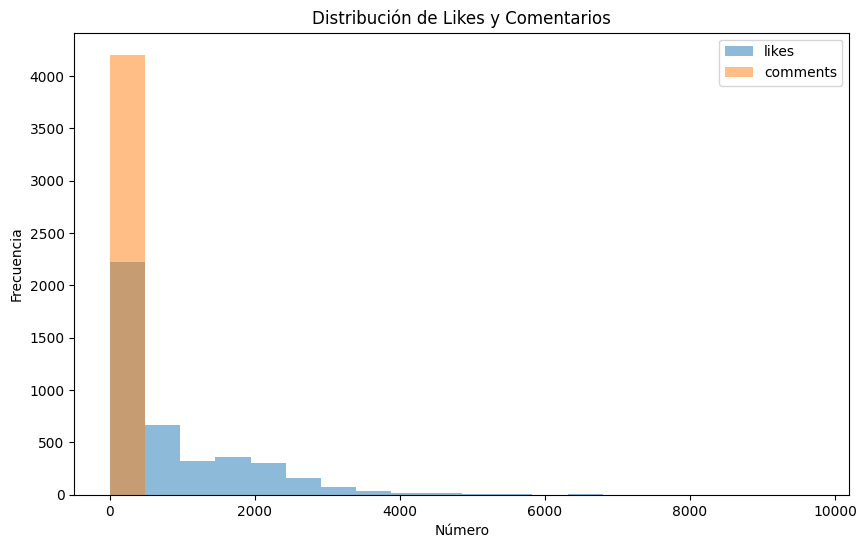

In [13]:
import pandas as pd
import matplotlib.pyplot as plt


uwu[['likes', 'comments']].plot(kind='hist', alpha=0.5, bins=20, figsize=(10, 6))
plt.title('Distribución de Likes y Comentarios')
plt.xlabel('Número')
plt.ylabel('Frecuencia')
plt.show()


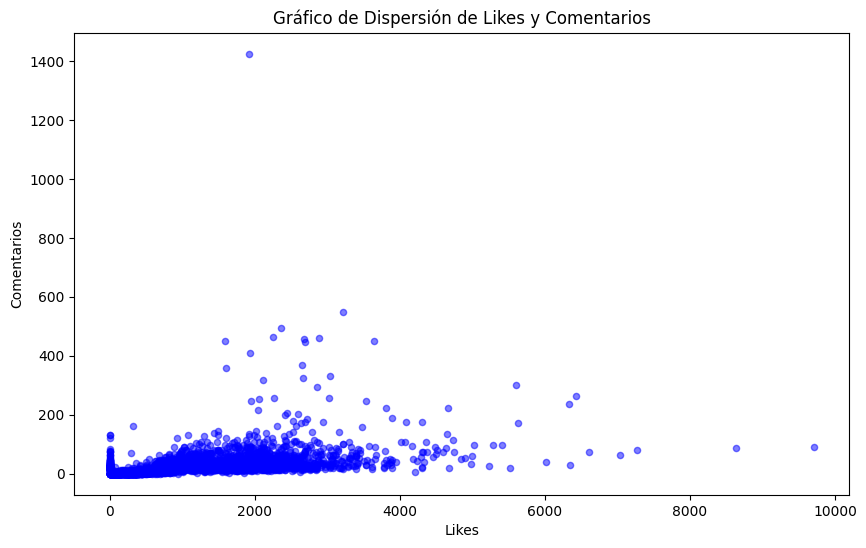

In [14]:
uwu.plot(kind='scatter', x='likes', y='comments', color='blue', alpha=0.5, figsize=(10, 6))
plt.title('Gráfico de Dispersión de Likes y Comentarios')
plt.xlabel('Likes')
plt.ylabel('Comentarios')
plt.show()



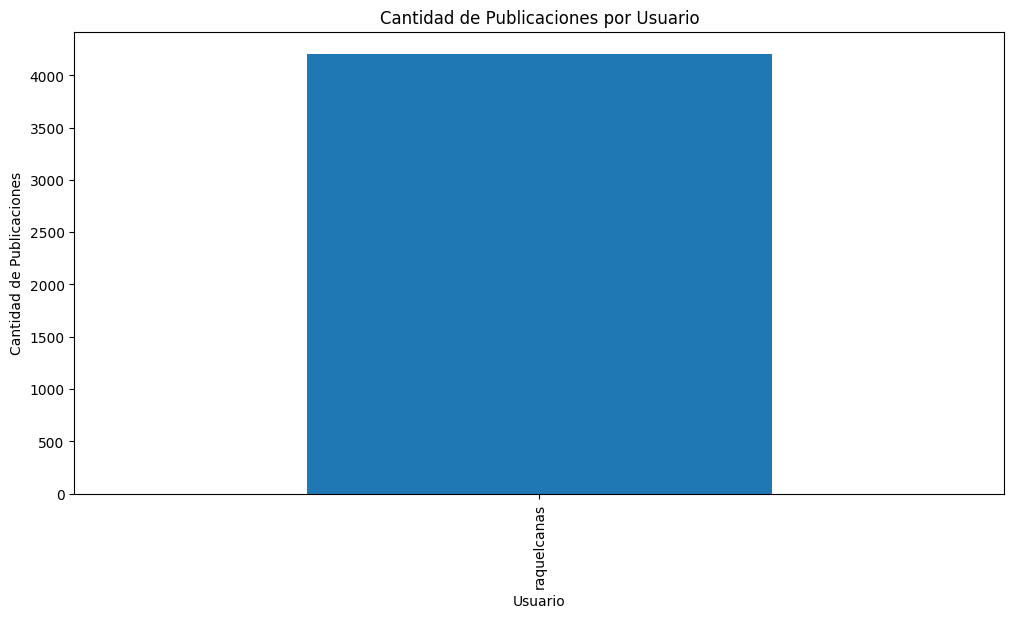

In [15]:
uwu['owner_username'].value_counts().plot(kind='bar', figsize=(12, 6))
plt.title('Cantidad de Publicaciones por Usuario')
plt.xlabel('Usuario')
plt.ylabel('Cantidad de Publicaciones')
plt.show()


In [5]:
import os
import pandas as pd
import shutil
from datetime import datetime

# Path to the directory you want to explore
directory = 'images/raquelcanas/'

# Path to your CSV file
csv_file_path = 'images/raquelcanas/raquelcanas.csv'  # Replace with the actual path

# Specify the threshold date for deletion (older than 2017)
threshold_date = datetime.strptime('2017-01-01', '%Y-%m-%d')

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_file_path)

# Iterate through the rows of the DataFrame
for index, row in df.iterrows():
    mediaid = str(row['mediaid'])  # Assuming 'mediaid' is the folder name
    date_str = row['date_local']
    
    # Convert the date string to a datetime object
    folder_date = datetime.strptime(date_str, '%Y-%m-%d_%H-%M-%S_UTC')
    
    # Check if the folder date is older than 2017
    if folder_date < threshold_date:
        folder_path = os.path.join(directory, mediaid)
        
        # Make sure the folder exists before attempting to delete
        if os.path.exists(folder_path):
            shutil.rmtree(folder_path)
            print(f"Deleted folder: {folder_path}")
        else:
            print(f"Folder not found: {folder_path}")


Deleted folder: images/raquelcanas/1417568950883327398
Deleted folder: images/raquelcanas/1417062450649664662
Deleted folder: images/raquelcanas/1416856231167253913
Deleted folder: images/raquelcanas/1415659188709006823
Deleted folder: images/raquelcanas/1415567023299454969
Deleted folder: images/raquelcanas/1414945826761124282
Deleted folder: images/raquelcanas/1414840927478124603
Deleted folder: images/raquelcanas/1414137241647112352
Deleted folder: images/raquelcanas/1412702228690924546
Deleted folder: images/raquelcanas/1411905394967853597
Deleted folder: images/raquelcanas/1411776900854347798
Deleted folder: images/raquelcanas/1411297732123309419
Deleted folder: images/raquelcanas/1409154857704923517
Deleted folder: images/raquelcanas/1409075744482890285
Deleted folder: images/raquelcanas/1408100158079921193
Deleted folder: images/raquelcanas/1406692751000812064
Deleted folder: images/raquelcanas/1406234269239758746
Deleted folder: images/raquelcanas/1406144320679347598
Deleted fo